Imports

In [24]:
import pandas as pd
import quandl
import math,math,datetime
import numpy as np
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

style.use('ggplot')

Fetching datset

In [25]:
df = quandl.get('WIKI/GOOGL')
print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [26]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume',]]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  3.712563    0.324968   44659000.0
2004-08-20   54.322689  0.710922    7.227007   22834300.0
2004-08-23   54.869377  3.729433   -1.227880   18256100.0
2004-08-24   52.597363  6.417469   -5.726357   15247300.0
2004-08-25   53.164113  1.886792    1.183658    9188600.0


In [27]:
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.01 * len(df)))
# print(forecast_out)
df['label'] = df[forecast_col].shift(-forecast_out)
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume      label
Date                                                                
2004-08-19   50.322842  3.712563    0.324968   44659000.0  69.078238
2004-08-20   54.322689  0.710922    7.227007   22834300.0  67.839414
2004-08-23   54.869377  3.729433   -1.227880   18256100.0  68.912727
2004-08-24   52.597363  6.417469   -5.726357   15247300.0  70.668146
2004-08-25   53.164113  1.886792    1.183658    9188600.0  71.219849


In [28]:
# df.dropna(inplace=True)

# x = df.drop(['label'], axis=1).values
# y = np.array(df['label'])

# x = preprocessing.scale(x)

# # x = x[:forecast_out+1]

# print(len(x),len(y))

In [29]:
# x_tarin, x_test , y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2)

# clf = LinearRegression(n_jobs=-1)
# # clf = svm.SVR()
# clf.fit(x_tarin, y_train)
# accuracy = clf.score(x_test, y_test)

# print(accuracy)

In [30]:
X = df.drop(['label'], axis=1)
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]



df.dropna(inplace=True)
y = np.array(df['label'])

#test & trainig set
X_train, X_test , y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)
# clf = svm.SVR()

#training
clf.fit(X_train, y_train)

with open( 'linearregression.pickle', 'wb') as f:
    pickle.dump(clf, f)

pickle_in = open('linearregression.pickle', 'rb')
clf = pickle.load(pickle_in)

accuracy = clf.score(X_test, y_test)

clf = LinearRegression(n_jobs=-1)
clf.fit(X, y)

forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)




# print(accuracy)

[1102.72441585 1072.94302567 1019.97846012 1061.35511475 1073.41112712
 1073.6704638  1092.34009906 1111.53802295 1114.79425781 1122.88446295
 1132.21136989 1129.55873547 1148.98088535 1164.63691702 1136.29374486
 1122.53924807 1088.3613043  1103.53029796 1114.5175613  1121.42422765
 1135.35365903 1150.0075212  1181.54723103 1186.00962596 1157.97135608
 1168.90059212 1170.73467089 1153.50001869 1118.8495838  1115.25788027
 1113.09864127 1070.31746868 1042.68911028 1073.23217161 1021.52669016] 0.9753583454063085 35


<function matplotlib.pyplot.show(close=None, block=None)>

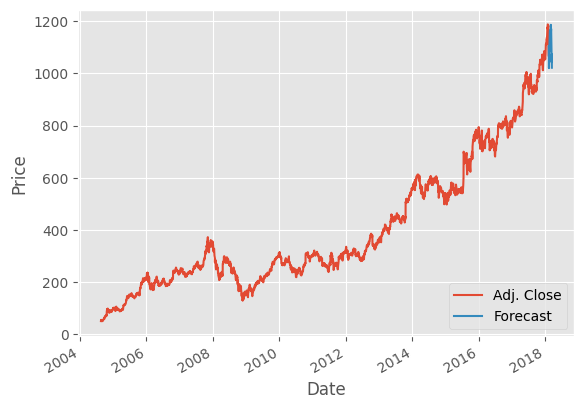

In [31]:
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc=4)
plt.show

making a regression model from scratch

In [32]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

xs = np.array([i for i in range(0,10)], dtype=np.float64)
print(xs)

ys = np.array([5,4,6,5,4,7,5,6,5,7], dtype=np.float64)
print(ys)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[5. 4. 6. 5. 4. 7. 5. 6. 5. 7.]


In [33]:
def best_fit_slope_and_intercept(xs,ys):
  m = (mean(xs)*mean(ys) - mean(xs*ys)) / (mean(xs)**2 - mean(xs**2))
  b = mean(ys) - m*mean(xs)
  return m,b

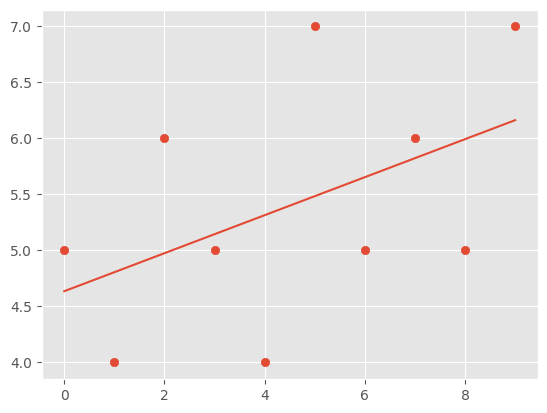

In [34]:
m,b = best_fit_slope_and_intercept(xs,ys)

regression_line = [ (m*x) + b for x in xs]

plt.scatter(xs,ys)
plt.plot(xs,regression_line)
plt.show()

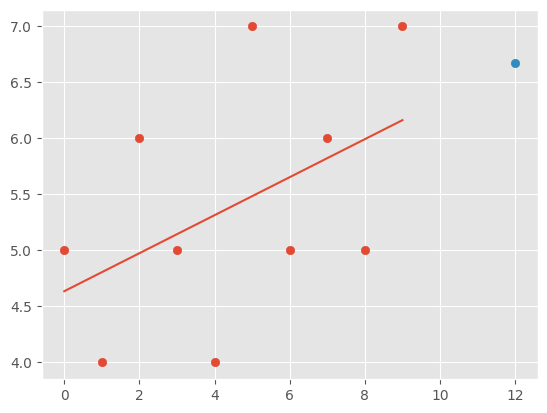

In [35]:
predic_x = 12
predict_y = (m*predic_x) + b

plt.scatter(xs,ys)
plt.scatter(predic_x,predict_y)
plt.plot(xs,regression_line)
plt.show()

Accuracy: R squared
R sq : Coefficient of Determination

In [36]:
def squared_error(ys_original, ys_line):
    return sum((ys_line-ys_original)**2)

def coefficient_of_determination(ys_original,ys_line):
    y_mean_line = [mean(ys_original) for y in ys_original]
    sq_error_regr = squared_error(ys_original , ys_line)
    sq_error_y_mean = squared_error(ys_original, y_mean_line)

    return 1 - (sq_error_regr/sq_error_y_mean)

In [37]:
r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

0.22843822843822825


Testing Assumptions

In [38]:
import random

def create_dataset(how_many, variance, step, correlation=False):
    val = 1
    ys = []
    for i in range(how_many):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val -=step
    xs = [i for i in range(len(ys))]
    return np.array(xs, dtype=np.float64) , np.array(ys, dtype=np.float64)

    

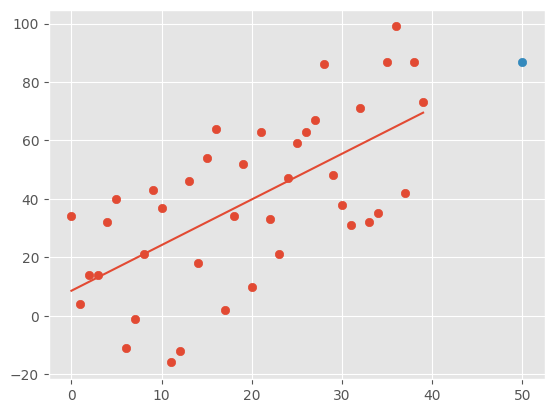

R squarred: 0.4075327237886094


In [39]:
xs , ys  = create_dataset(40,40,2,correlation='pos')

m,b = best_fit_slope_and_intercept(xs,ys)

regression_line = [(m*x)+b for x in xs]


predic_x = 50
predict_y = (m*predic_x) + b

plt.scatter(xs,ys)
plt.scatter(predic_x,predict_y)
plt.plot(xs,regression_line)
plt.show()

r_squared = coefficient_of_determination(ys, regression_line)
print(f'R squarred: {r_squared}')